Stochastic turning model investigate $\tau$

In [1]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
import cv2
import sys, os, pathlib
sys.path.append('src')
from utils import gen_plot
from models import stochastic_turning

## Run the RL simulation

### Sweep over tau parameter

tau =  0.01
99.9%%
 success = 63


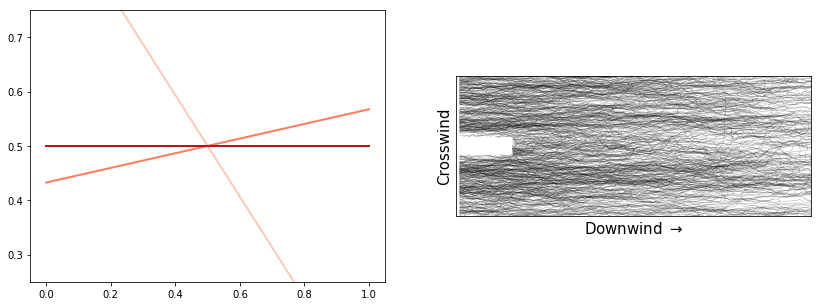

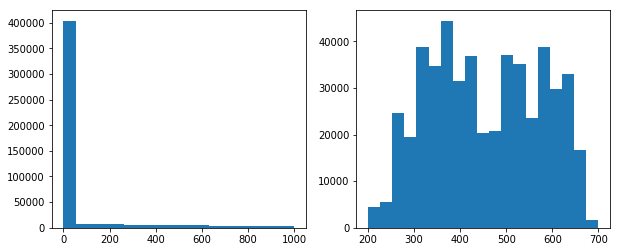

tau =  0.5
99.9%%
 success = 143


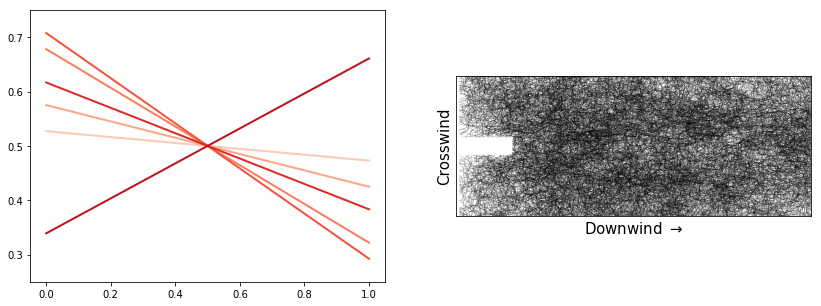

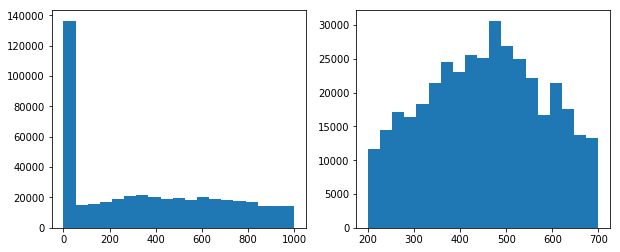

tau =  1
99.9%%
 success = 186


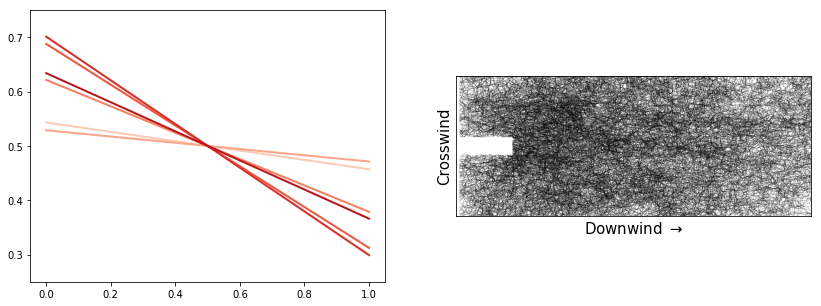

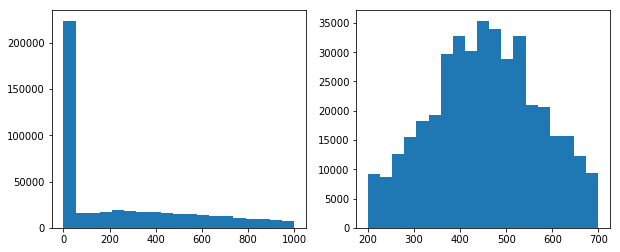

tau =  3
99.9%%
 success = 205


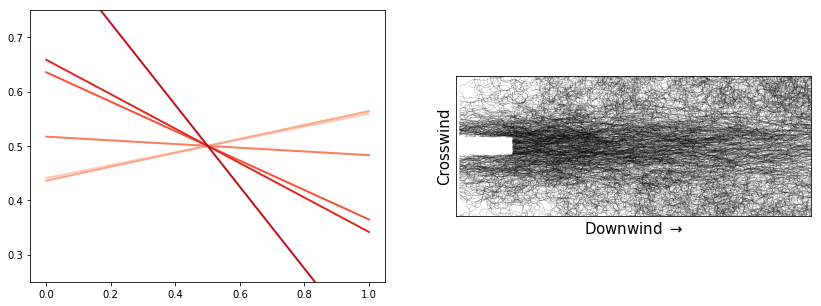

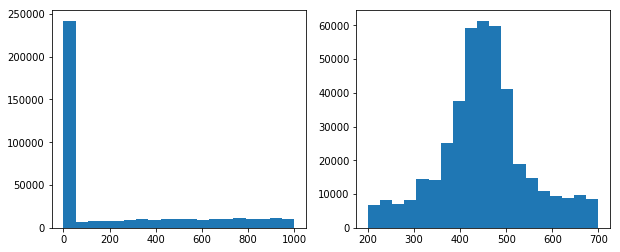

tau =  5
99.9%%
 success = 206


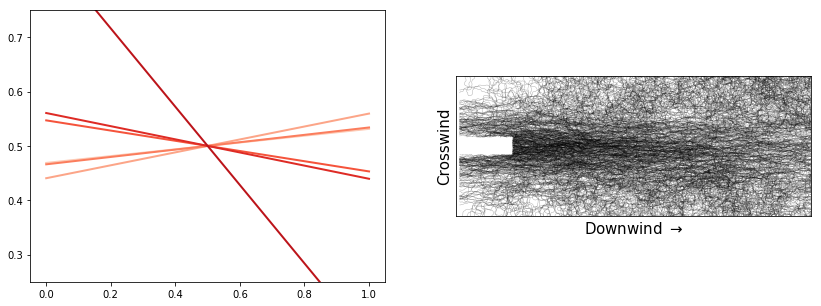

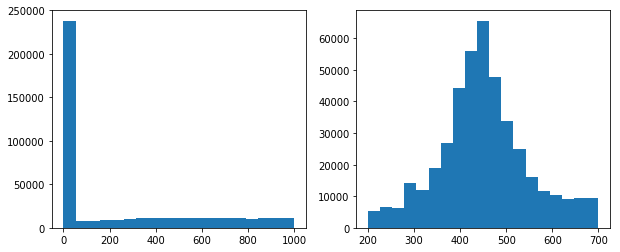

tau =  10
99.9%%
 success = 182


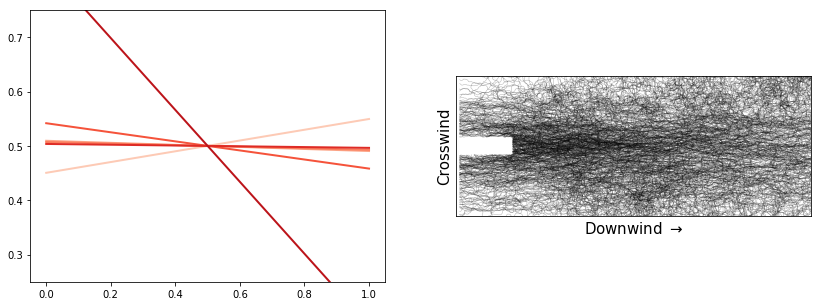

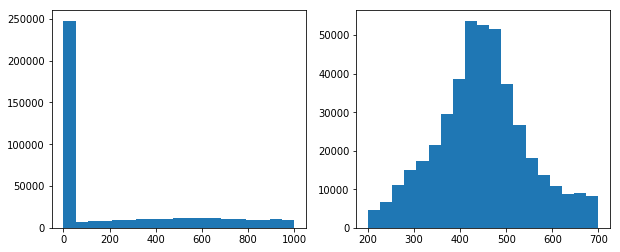

tau =  20
99.9%%
 success = 183


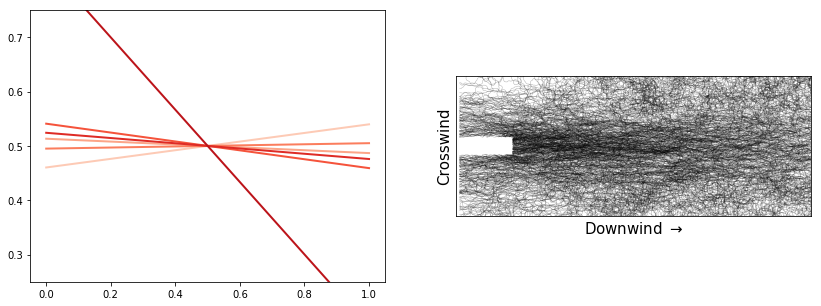

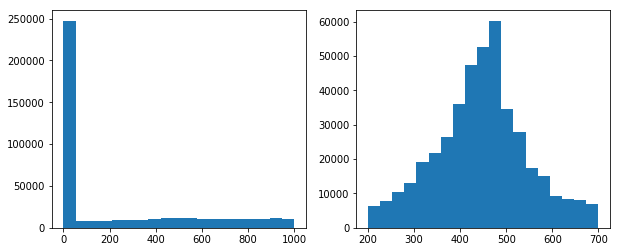

In [39]:
out_dir = 'data/output/stochastic_turning/tau'
if not os.path.exists(out_dir):
    pathlib.Path(out_dir).mkdir(parents=True, exist_ok=False) 

avgs = []
taus = [0.01, 0.5, 1, 3, 5, 10, 20]
freq_bins = [-1, 0.01, 0.5, 1, 2, 3, 100]
colors = plt.cm.Reds(np.linspace(0.2, 0.8, len(taus)))
for iT, tau in enumerate(taus):
    print ('tau = ', tau)
    a = stochastic_turning()
    a.vid_file = r'data/intermittent_smoke.avi'
    a.x0_min = 500
    a.x0_min = 1000
    a.max_x = 1200
    a.num_walkers = 1000
    a.x_end = 150
    a.y_end_rad = 25
    a.def_actions()
    a.num_steps = 5000 # 2000

    a.def_states(freq_bins=freq_bins, tau=tau, odor_vec_len=int(tau*200))

    xs, ys, Q, Q_terminal, path_lengths = a.run()

    dists = []
    for iW in range(a.num_walkers):
        _dist = (xs[path_lengths[iW] - 1, iW]**2 + (ys[path_lengths[iW] - 1, iW] - a.y_center)**2.0)**0.5
        dists.append(_dist)
    
    temp = 250 
    Q_norm = (np.exp(Q_terminal.T/temp)/np.sum(np.exp(Q_terminal/temp), axis=-1)).T
    
    
    fig = plt.figure(figsize=(14, 5))
    plt.subplot(121)
    for iS in range(a._num_states):
        c = plt.cm.Reds(np.linspace(0.2, 0.8, a._num_states))
        plt.plot(Q_norm[iS], color=c[iS], lw=2, 
            label='$W_{freq}$ > %.1f' % freq_bins[iS])
    plt.ylim(0.25, 0.75)
    
    a.x0_min = 150
    a.xo_max = 1200
    a.max_x = 1200
    a.num_walkers = 500
    a.num_steps = 1000
    a.y0_spread = 200
    xs, ys, path_lengths = a.run_optimal_action(Q_terminal, temp=temp)

    ax = plt.subplot(122)
    for iW in range(a.num_walkers):
        colors = plt.cm.viridis(np.linspace(0, 1, path_lengths[iW]))
        #plt.scatter(xs[:path_lengths[iW], iW],  
        #    ys[:path_lengths[iW], iW], 
        #            c=colors, s=.5)
        plt.plot(xs[:path_lengths[iW], iW],  
            ys[:path_lengths[iW], iW], 
                    c='k', lw=0.5, alpha=0.3)

    print ('\n success =', np.sum(path_lengths < a.num_steps - 1))
        
    ax.set_aspect('equal')
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(r'Downwind $\rightarrow$', fontsize=15)
    plt.ylabel('Crosswind', fontsize=15)
    ax.set_xlim(-10, 1000)
    ax.set_ylim(450 - 200, 450 + 200)
    plt.show()
    
    fig = plt.figure(figsize=(10, 4))
    plt.subplot(121)
    plt.hist(xs.flatten(), bins=np.linspace(0, 1000, 20))
    plt.subplot(122)
    plt.hist(ys.flatten(), bins=np.linspace(450-250, 450+250, 20))
    plt.show()